<a href="https://colab.research.google.com/github/Raniel-Ferreira/DIO_Laboratorio_Python-Pandas/blob/main/DIO_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando com arquivos excel e csv

Neste notebook estarei colocando em prática o conteúdo do laboratório de python e pandas da Digital Innovation One

In [2]:
#importar as bibliotecas necessárias

import pandas as pd #para analisar os dados
import matplotlib.pyplot as plt #para fazer os gráficos
plt.style.use("seaborn") #para definir o estilo dos gráficos

In [3]:
#função do próprio collab para carregar arquivos
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [6]:
#pegando o arquivo e jogando ele numa variável
df = pd.read_excel("AdventureWorks.xlsx")

In [8]:
df.head() #vendo as 5 primeiras linhas

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [9]:
df.tail() #vendo as 5 últimas linhas

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
903,2008-12-21,2008-12-25,306,1155,19060,200812214CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [11]:
df.shape #visão geral da quantidade de linhas e colunas

(904, 16)

In [12]:
df.dtypes #vamos verificar os tipos de dados

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [14]:
#Quanto foi a receita total?
df["Valor Venda"].sum() #somar todos os valores dessa coluna

5984606.1426

In [15]:
#Qual o custo Total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando uma coluna com o custo mul significa multiplicação, ou seja multiplicamos os valores de uma coluna pela outra e o resultado será apresentado em outra coluna

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [17]:
#Qual o custo Total?
df["custo"].sum() #somar todos os valores da nova coluna que fizemos

2486783.05

In [18]:
#Agora que temos a receita e custo e o total, podemos achar o Lucro total
#Vamos criar uma coluna de Lucro que será Receita - Custo
df["lucro"]  = df["Valor Venda"] - df["custo"] 

In [19]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [20]:
#Total Lucro
round(df["lucro"].sum(),2)

3497823.09

**Vamos agrupar os dados de acordo com a cor dos produtos**

In [24]:
#Agrupamento por cor
df.groupby(df["Cor"])["lucro"].sum()

Cor
Black     1.395134e+06
Grey      1.110025e+06
Red       3.448507e+05
Silver    9.816050e+04
White     5.496528e+05
Name: lucro, dtype: float64

In [27]:
#vamos ver qual foi o maior lucro
df['lucro'].max()

19659.3

In [28]:
#vamos ver qual foi o menor lucro
df['lucro'].min()

78.4

In [31]:
#vamos ver qual foi a média de lucro
df['lucro'].mean()

3869.273332522112

In [32]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
dtype: int64

**Não há nenhum valor nulo no arquivo analisado**

In [33]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

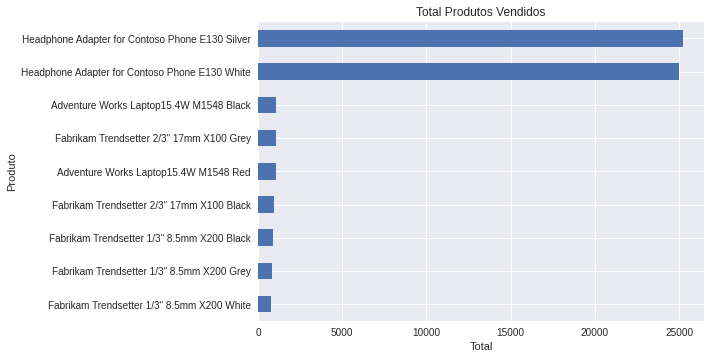

In [34]:
#Vamos criar um gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

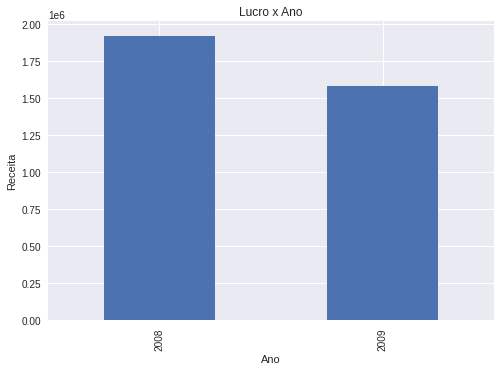

In [35]:
#Agora um gráfico de barras
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

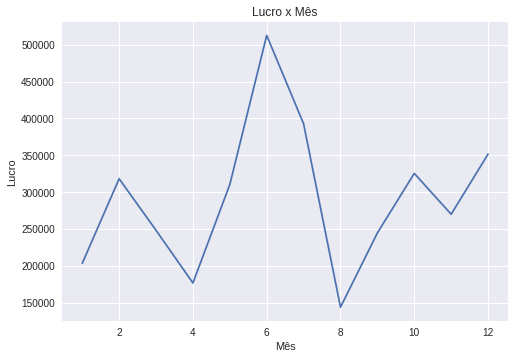

In [37]:
#Um gráfico de linhas
df.groupby(df["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

In [38]:
#função para descobrir todos os valores estatísticos como média desvio padrão mediana
df["lucro"].describe()

count      904.000000
mean      3869.273333
std       2823.813548
min         78.400000
25%       2001.720000
50%       3405.240000
75%       4670.680000
max      19659.300000
Name: lucro, dtype: float64

Na ordem:


*   Count = Quantidade
*   Mean = Média
*   Std = Do inglês Standard Deviation para o português Desvio Padrão
*   Min = Mínimo, menor valor
*   25% = quartil inferior
*   50% = quartil do meio
*   75% = quartil superior
*   Max = Maxímo, maior valor



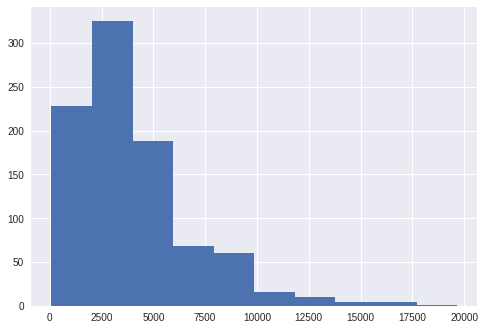

In [39]:
#Histograma
plt.hist(df["lucro"]);

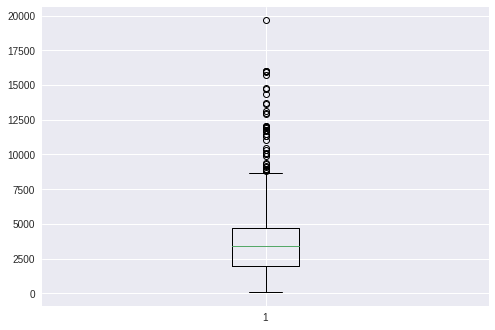

In [40]:
#Gráfico de Boxplot
plt.boxplot(df["lucro"]);

**E se quisesse criar outro dataframe, mas pra analisar só uma variável?**

In [41]:
#Selecionando apenas as vendas com produtos da cor vermelha
df_red = df[df["Cor"] == 'Red']

In [43]:
df_red.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


Dessa maneira, pode-se ver que não é preciso saber tantos comandos da biblioteca pandas e que com simples manipulações já é possível extrair muitas informações e realizar nossas análises de dados.